# Alzheimer's Disease

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D
from keras.utils import to_categorical

In [2]:
data = pd.read_csv('alzheimers_disease_data.csv')  
data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [3]:
data = data.dropna()

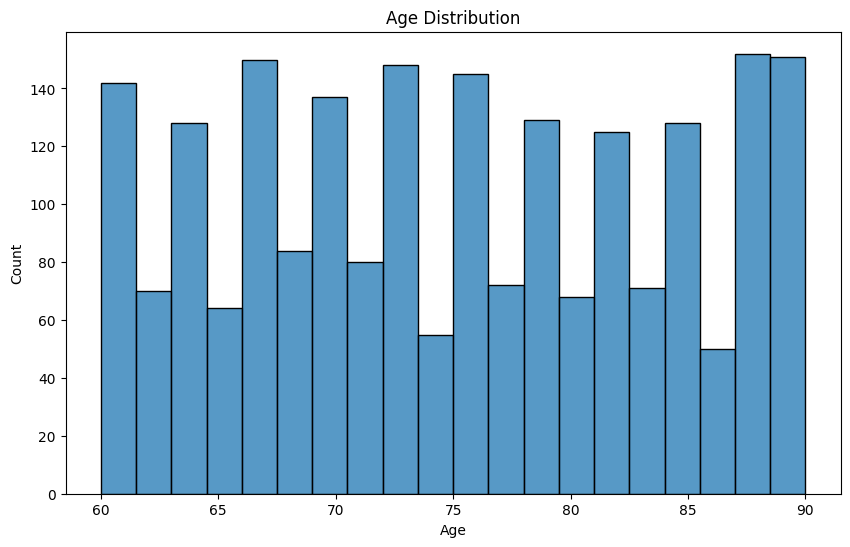

In [4]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20)
plt.title('Age Distribution')
plt.show()

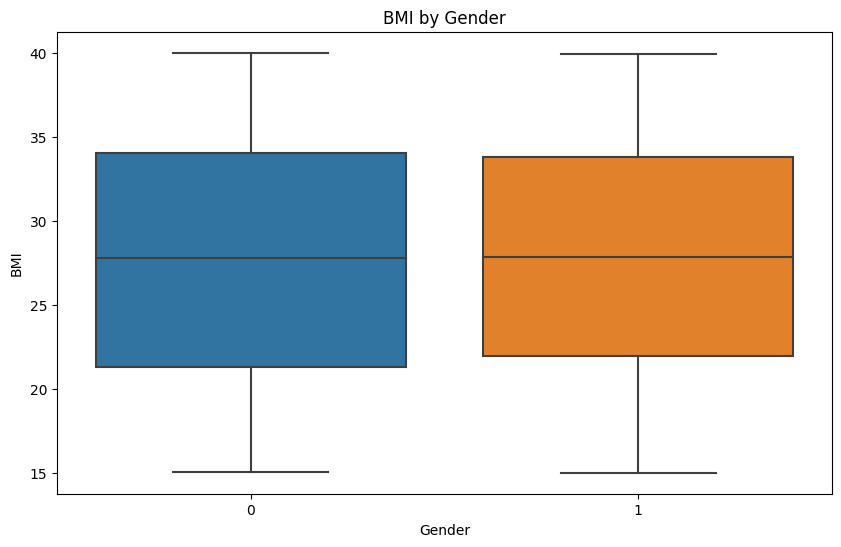

In [5]:
# Boxplot for BMI by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='BMI', data=data)
plt.title('BMI by Gender')
plt.show()

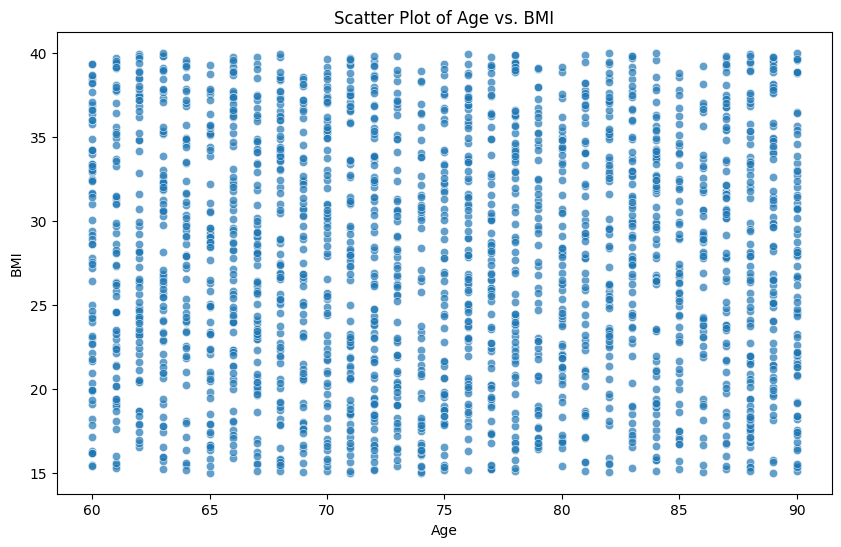

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='BMI', data=data, alpha=0.7)
plt.title('Scatter Plot of Age vs. BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()


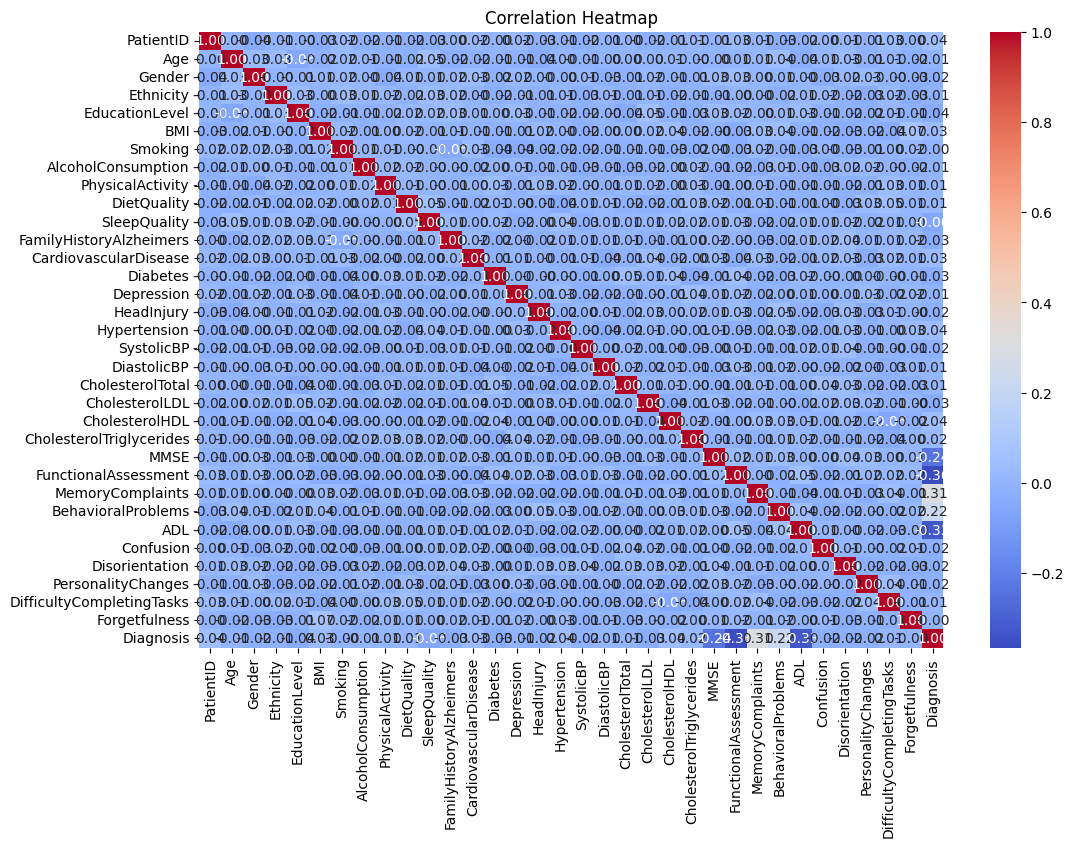

In [7]:
numeric_data = data.select_dtypes(include=['number'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

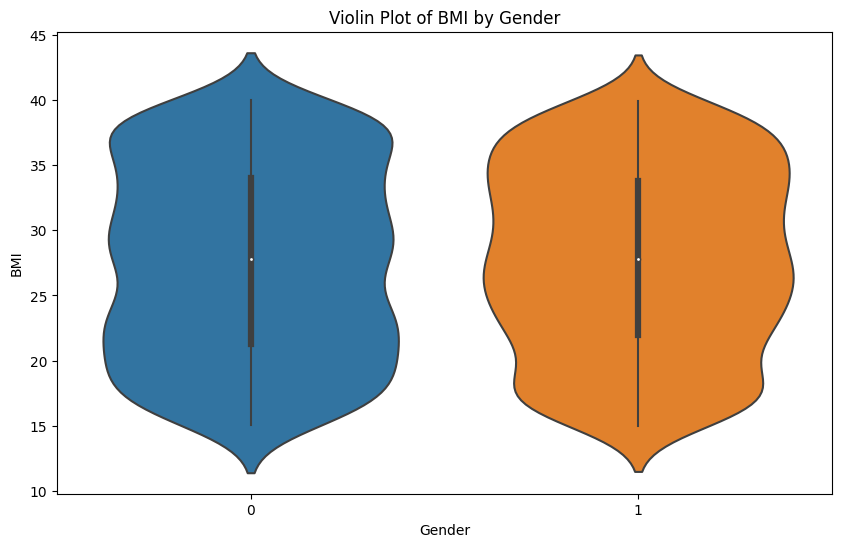

In [8]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='BMI', data=data)
plt.title('Violin Plot of BMI by Gender')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.show()


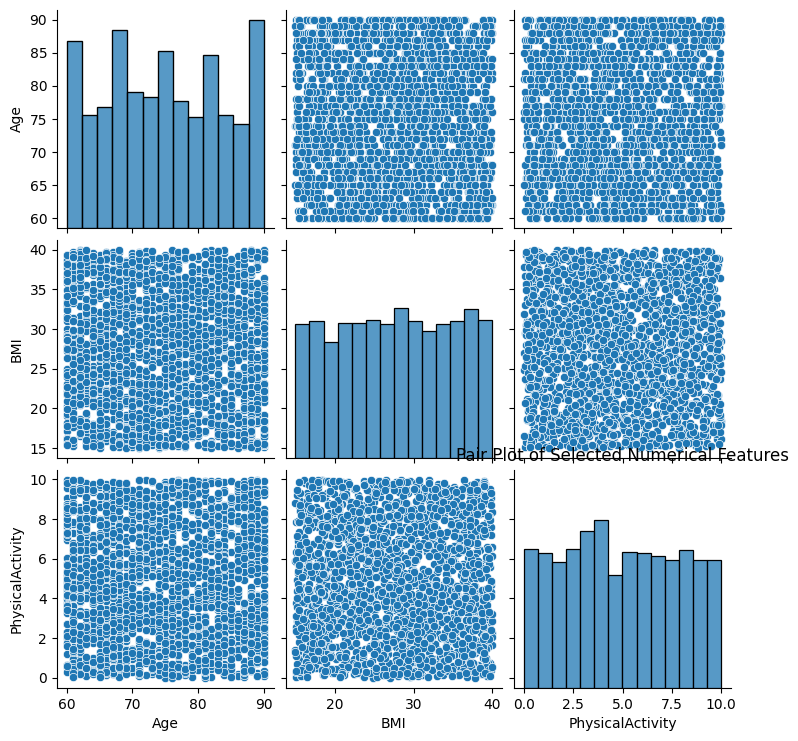

In [9]:
selected_features = data[['Age', 'BMI', 'PhysicalActivity']]
sns.pairplot(selected_features)
plt.title('Pair Plot of Selected Numerical Features')
plt.show()

In [10]:
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

In [11]:
X = pd.get_dummies(X)

X = X.astype('float32')

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

In [15]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# CNN MODEL

In [16]:
model = Sequential()

model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 32, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 16, 64)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 14, 128)           24704     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 7, 128)            0         
 g1D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 128)            0

In [18]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, class_weight=class_weights_dict)

Epoch 1/50


43/43 [==============================] - 2s 14ms/step - loss: 0.7171 - accuracy: 0.5200 - val_loss: 0.6934 - val_accuracy: 0.4767
Epoch 2/50
43/43 [==============================] - 0s 8ms/step - loss: 0.6982 - accuracy: 0.5127 - val_loss: 0.6976 - val_accuracy: 0.3808
Epoch 3/50
43/43 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5156 - val_loss: 0.6915 - val_accuracy: 0.6134
Epoch 4/50
43/43 [==============================] - 0s 7ms/step - loss: 0.6935 - accuracy: 0.5069 - val_loss: 0.6876 - val_accuracy: 0.6192
Epoch 5/50
43/43 [==============================] - 0s 7ms/step - loss: 0.6919 - accuracy: 0.5665 - val_loss: 0.6989 - val_accuracy: 0.3808
Epoch 6/50
43/43 [==============================] - 0s 7ms/step - loss: 0.6946 - accuracy: 0.4909 - val_loss: 0.6904 - val_accuracy: 0.6192
Epoch 7/50
43/43 [==============================] - 0s 8ms/step - loss: 0.6926 - accuracy: 0.5360 - val_loss: 0.6901 - val_accuracy: 0.6192
Epoch 8/50
43/43 

14/14 [==============================] - 0s 2ms/step - loss: 0.3030 - accuracy: 0.8884
Test Accuracy: 88.84%


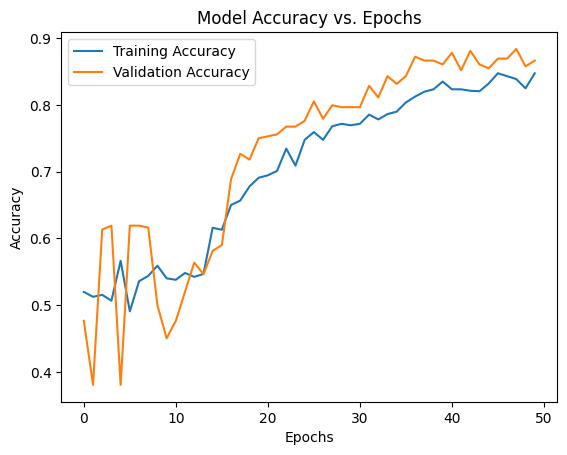

14/14 [==============================] - 0s 3ms/step
   Actual  Predicted
0       0          0
1       0          0
2       0          0
3       0          0
4       0          0


In [19]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int).flatten()  # Binary threshold at 0.5
actual_classes = y_test

comparison = pd.DataFrame({'Actual': actual_classes, 'Predicted': predicted_classes})
print(comparison.head())

## RandomForestClassifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)
y_pred_rf = rf_model.predict(X_test.reshape(X_test.shape[0], -1))

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       277
           1       0.96      0.81      0.88       153

    accuracy                           0.92       430
   macro avg       0.93      0.90      0.91       430
weighted avg       0.92      0.92      0.92       430



## GradientBoostingClassifier

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)
y_pred_gb = gb_model.predict(X_test.reshape(X_test.shape[0], -1))

print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       277
           1       0.95      0.93      0.94       153

    accuracy                           0.96       430
   macro avg       0.96      0.95      0.95       430
weighted avg       0.96      0.96      0.96       430



## SVC

In [22]:
from sklearn.svm import SVC

svc_model = SVC(random_state=42)
svc_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)
y_pred_svc = svc_model.predict(X_test.reshape(X_test.shape[0], -1))

print("Support Vector Classifier Report:")
print(classification_report(y_test, y_pred_svc))


Support Vector Classifier Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       277
           1       0.80      0.71      0.75       153

    accuracy                           0.83       430
   macro avg       0.82      0.81      0.81       430
weighted avg       0.83      0.83      0.83       430



## LogisticRegression

In [23]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)
y_pred_lr = lr_model.predict(X_test.reshape(X_test.shape[0], -1))

print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       277
           1       0.78      0.71      0.74       153

    accuracy                           0.83       430
   macro avg       0.81      0.80      0.81       430
weighted avg       0.82      0.83      0.82       430



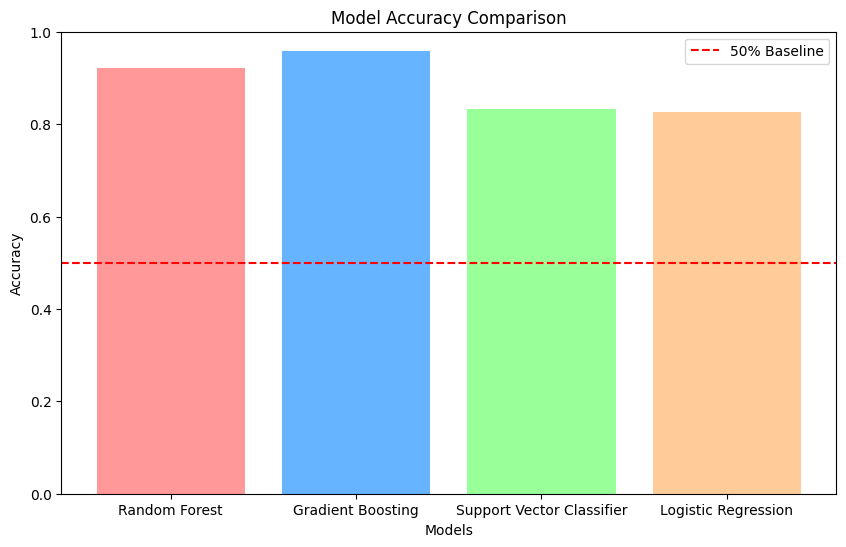

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

accuracies = {
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'Gradient Boosting': accuracy_score(y_test, y_pred_gb),
    'Support Vector Classifier': accuracy_score(y_test, y_pred_svc),
    'Logistic Regression': accuracy_score(y_test, y_pred_lr)
}

plt.figure(figsize=(10, 6))
models = list(accuracies.keys())
scores = list(accuracies.values())

colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']
plt.bar(models, scores, color=colors)

plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.axhline(y=0.5, color='red', linestyle='--', label='50% Baseline')
plt.legend()

plt.show()